## Random Forest Classifier

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('../data/ml/hotel_reservations_train.csv')
data_test = pd.read_csv('../data/ml/hotel_reservations_test.csv')

In [3]:
X_train = data_train.drop('booking_status', axis=1)
y_train = data_train['booking_status']

X_test = data_test.drop('booking_status', axis=1)
y_test = data_test['booking_status']

In [4]:
# Train a Random Forest model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=100,                   # Number of trees in the forest
    criterion='gini',                   # Function to measure the quality of a split
    max_depth=None,                     # Maximum depth of the tree
    min_samples_split=2,                # Minimum number of samples required to split an internal node
    min_samples_leaf=1,                 # Minimum number of samples required to be at a leaf node
    min_weight_fraction_leaf=0.0,       # Minimum weighted fraction of the sum total of weights
    max_features='sqrt',                # Number of features to consider when looking for the best split
    max_leaf_nodes=None,                # Grow trees with max_leaf_nodes in best-first fashion
    min_impurity_decrease=0.0,          # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
    bootstrap=True,                     # Whether bootstrap samples are used when building trees
    oob_score=False,                    # Whether to use out-of-bag samples to estimate the generalization accuracy
    n_jobs=None,                        # The number of jobs to run in parallel
    random_state=42,                    # Seed of the pseudo random number generator
    verbose=1,                          # Controls the verbosity when fitting and predicting
    warm_start=False,                   # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble
    class_weight=None,                  # Weights associated with classes in the form {class_label: weight}
    ccp_alpha=0.0,                      # Complexity parameter used for Minimal Cost-Complexity Pruning
    max_samples=None                    # If bootstrap is True, the number of samples to draw from X to train each base estimator
)

In [5]:
# Fit the model
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.8s


RandomForestClassifier(random_state=42, verbose=1)

In [6]:
# Make predictions
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [7]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import balanced_accuracy_score

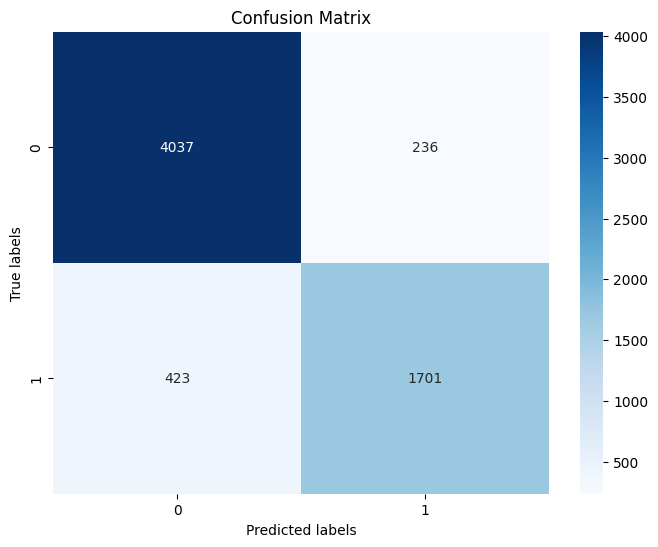

In [8]:
confusion_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [9]:
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4273
           1       0.88      0.80      0.84      2124

    accuracy                           0.90      6397
   macro avg       0.89      0.87      0.88      6397
weighted avg       0.90      0.90      0.90      6397



In [10]:
# Compute the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Compute the precision score
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

# Compute the recall score
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Recall: {recall:.2f}')

# Compute the F1 score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')

# Compute the balanced accuracy score
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

# Compute the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred, average='weighted', multi_class='ovr')
print(f'ROC AUC: {roc_auc:.2f}')

# Compute the ROC curve
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = roc_auc_score(y_test, y_pred)

Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Balanced Accuracy: 0.87
ROC AUC: 0.87


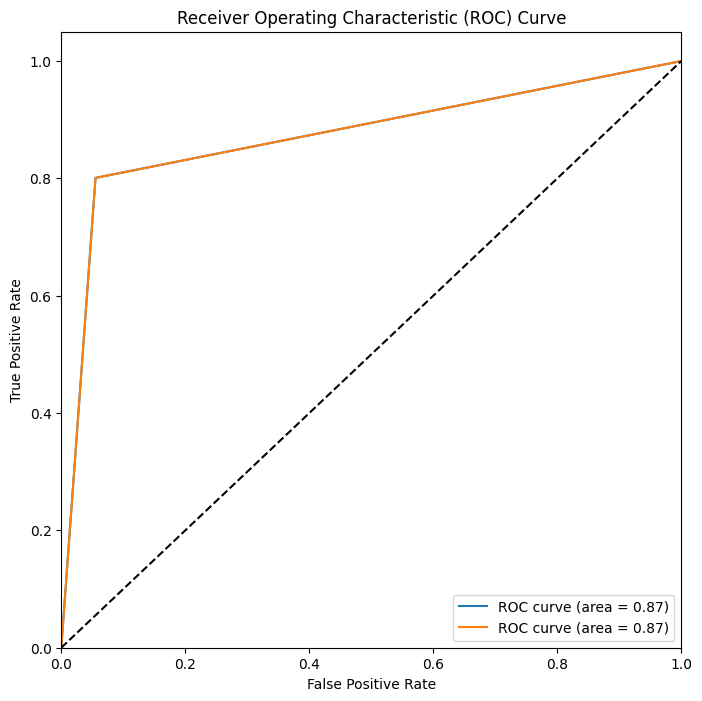

In [11]:
# Plot the ROC curve
fig, ax = plt.subplots(figsize=(8, 8))
for i in range(n_classes):
    ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

ax.plot([0, 1], [0, 1], 'k--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (ROC) Curve')
ax.legend(loc='lower right')
plt.savefig('../reports/images/roc_curve_random_forest.png')
plt.show()

In [14]:
# Save the model
import joblib

joblib.dump(model, '../models/random_forest.pkl')

['../models/random_forest.pkl']

In [12]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import MaxAbsScaler
# from sklearn.preprocessing import RobustScaler

# scalers = {
#     'standard': StandardScaler(),
#     'min_max': MinMaxScaler(),
#     'max_abs': MaxAbsScaler(),
#     'robust': RobustScaler()
# }

# for scaler in scalers:
#     # Scale the training and test sets
#     X_train_scaled = scalers[scaler].fit_transform(X_train)
#     X_test_scaled = scalers[scaler].transform(X_test)

#     model.fit(X_train_scaled, y_train)

#     # Make predictions
#     predictions_rfc = model.predict(X_test_scaled)

#     # Compute the accuracy score
#     accuracy = accuracy_score(y_test, predictions_rfc)
#     print(f'Accuracy: {accuracy:.2f}')

#     # Compute the precision score
#     precision = precision_score(y_test, predictions_rfc, average='weighted')
#     print(f'Precision: {precision:.2f}')

#     # Compute the recall score
#     recall = recall_score(y_test, predictions_rfc, average='weighted')
#     print(f'Recall: {recall:.2f}')

#     # Compute the F1 score
#     f1 = f1_score(y_test, predictions_rfc, average='weighted')
#     print(f'F1 Score: {f1:.2f}')

#     # Compute the balanced accuracy score
#     balanced_accuracy = balanced_accuracy_score(y_test, predictions_rfc)
#     print(f'Balanced Accuracy: {balanced_accuracy:.2f}')

#     # Compute the ROC AUC score
#     roc_auc = roc_auc_score(y_test, predictions_rfc, average='weighted', multi_class='ovr')
#     print(f'ROC AUC: {roc_auc:.2f}')

#     # Compute the ROC curve
#     fpr = dict()
#     tpr = dict()
#     roc_auc = dict()
#     n_classes = 2
#     for i in range(n_classes):
#         fpr[i], tpr[i], _ = roc_curve(y_test, predictions_rfc)
#         roc_auc[i] = roc_auc_score(y_test, predictions_rfc)

#     # Plot the ROC curve
#     fig, ax = plt.subplots(figsize=(8, 8))
#     for i in range(n_classes):
#         ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])

#     ax.plot([0, 1], [0, 1], 'k--')
#     ax.set_xlim([0.0, 1.0])
#     ax.set_ylim([0.0, 1.05])
#     ax.set_xlabel('False Positive Rate')
#     ax.set_ylabel('True Positive Rate')
#     ax.set_title('Receiver Operating Characteristic (ROC) Curve')
#     ax.legend(loc='lower right')
#     plt.savefig(f'../reports/images/roc_curve_rfc_{scaler}.png')
#     plt.show()

In [13]:
# Perform cross-validation with the Random Forest model
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

print(f'Cross-validation scores: {scores}')
print(f'Mean cross-validation score: {scores.mean():.2f}')

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.5s


Cross-validation scores: [0.88450264 0.89466484 0.89310143 0.89720539 0.88272088]
Mean cross-validation score: 0.89


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
